In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression , LogisticRegression , Ridge , ElasticNet , SGDRegressor, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor , RandomForestRegressor , AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor 
from xgboost import XGBRegressor
from catboost import CatBoostRegressor 
from lightgbm import LGBMRegressor
from sklearn.svm import SVR 

from sklearn.preprocessing import MinMaxScaler , StandardScaler , LabelEncoder , OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV , KFold, cross_val_score
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [2]:
Insurance= pd.read_csv(r'D:\ai\Work\datasets\Challenge\medical_insurance.csv')
Insurance

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,female,27.9,0,yes,southwest,16884.92,168.8492
1,18,male,33.8,1,no,southeast,1725.55,17.2555
2,28,male,33.0,3,no,southeast,4449.46,44.4946
3,33,male,22.7,0,no,northwest,21984.47,439.6894
4,32,male,28.9,0,no,northwest,3866.86,77.3372
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,212.0110
1334,18,female,31.9,0,no,northeast,2205.98,22.0598
1335,18,female,36.9,0,no,southeast,1629.83,16.2983
1336,21,female,25.8,0,no,southwest,2007.95,20.0795


In [3]:
print(Insurance['region'].value_counts(),
Insurance['discount_eligibility'].value_counts(),
Insurance['gender'].value_counts())
Insurance

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64 discount_eligibility
no     1064
yes     274
Name: count, dtype: int64 gender
male      676
female    662
Name: count, dtype: int64


,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,female,27.9,0,yes,southwest,16884.92,168.8492
1,18,male,33.8,1,no,southeast,1725.55,17.2555
2,28,male,33.0,3,no,southeast,4449.46,44.4946
3,33,male,22.7,0,no,northwest,21984.47,439.6894
4,32,male,28.9,0,no,northwest,3866.86,77.3372
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,212.0110
1334,18,female,31.9,0,no,northeast,2205.98,22.0598
1335,18,female,36.9,0,no,southeast,1629.83,16.2983
1336,21,female,25.8,0,no,southwest,2007.95,20.0795


In [4]:
le=LabelEncoder()
Gender={ 'male': 1 , 
                'female': 0 }
Insurance['gender'] = Insurance['gender'].map(Gender)
Insurance

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,0,27.9,0,yes,southwest,16884.92,168.8492
1,18,1,33.8,1,no,southeast,1725.55,17.2555
2,28,1,33.0,3,no,southeast,4449.46,44.4946
3,33,1,22.7,0,no,northwest,21984.47,439.6894
4,32,1,28.9,0,no,northwest,3866.86,77.3372
...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,no,northwest,10600.55,212.0110
1334,18,0,31.9,0,no,northeast,2205.98,22.0598
1335,18,0,36.9,0,no,southeast,1629.83,16.2983
1336,21,0,25.8,0,no,southwest,2007.95,20.0795


## Hint!!
### 
On discount eligibity I take 1 to no and 0 to yes. Cause in Insurance cases when you don't use your Insurance enough or having Cash payments they name you a good client and give you discounts. on the other hand without discount you have to pay more.

In [5]:
discount_eligibility={'yes': 0 , 
                                 'no': 1 }
Insurance['discount_eligibility'] = Insurance['discount_eligibility'].map(discount_eligibility)


## Hint!!
### 
About Insurance regions first I prefer to see their payments. I understand that regions of southwest and northwest are the same as number of rows and expenses but northeast has more rows and more expenses so I divide them and saw that the northeast is the same as the west regions.
### 
The last region is southwest and it has 325 rows the same as west regions but more sum of expenses. By this reasons I prefer to convert southwest, northwest, northeast to 1 and southeast to 2 manually as follows.

In [6]:
Insurance.groupby('region')['expenses'].sum()

region
northeast    4343668.64
northwest    4035711.93
southeast    5363689.80
southwest    4012754.82
Name: expenses, dtype: float64

In [7]:
le=LabelEncoder()
region={ 'northwest': 1 , 
                'northeast': 1 , 
                'southwest': 1,
                'southeast': 2,}
Insurance['region'] = Insurance['region'].map(region)

## EDA 

In [8]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   gender                1338 non-null   int64  
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   discount_eligibility  1338 non-null   int64  
 5   region                1338 non-null   int64  
 6   expenses              1338 non-null   float64
 7   premium               1338 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 83.8 KB


In [9]:
Insurance.describe()

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.795217,1.272048,13270.422414,262.874685
std,14.049960,0.500160,6.098382,1.205493,0.403694,0.445181,12110.011240,292.532178
min,18.000000,0.000000,16.000000,0.000000,0.000000,1.000000,1121.870000,11.218700
25%,27.000000,0.000000,26.300000,0.000000,1.000000,1.000000,4740.287500,87.354250
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9382.030000,174.997400
75%,51.000000,1.000000,34.700000,2.000000,1.000000,2.000000,16639.915000,342.908900
max,64.000000,1.000000,53.100000,5.000000,1.000000,2.000000,63770.430000,1983.106400


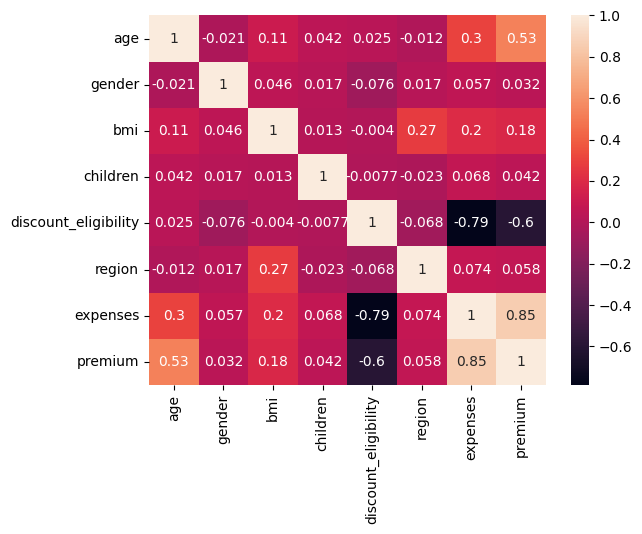

In [10]:
Insurance_corr=Insurance.corr()
sns.heatmap(Insurance_corr , annot=True)
plt.show()

### In this plot you can see outliers

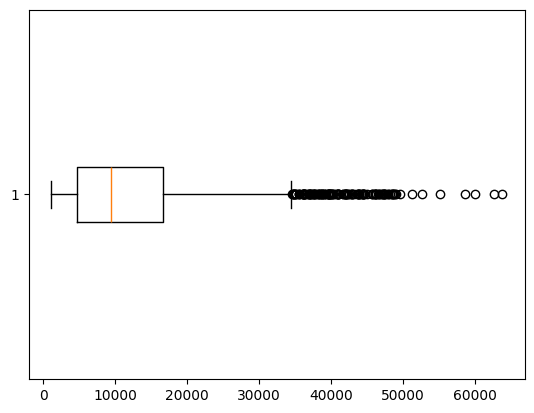

<Figure size 2000x2000 with 0 Axes>

In [11]:
plt.boxplot(Insurance['expenses'], orientation='horizontal')
plt.figure(figsize=(20,20))
plt.show()


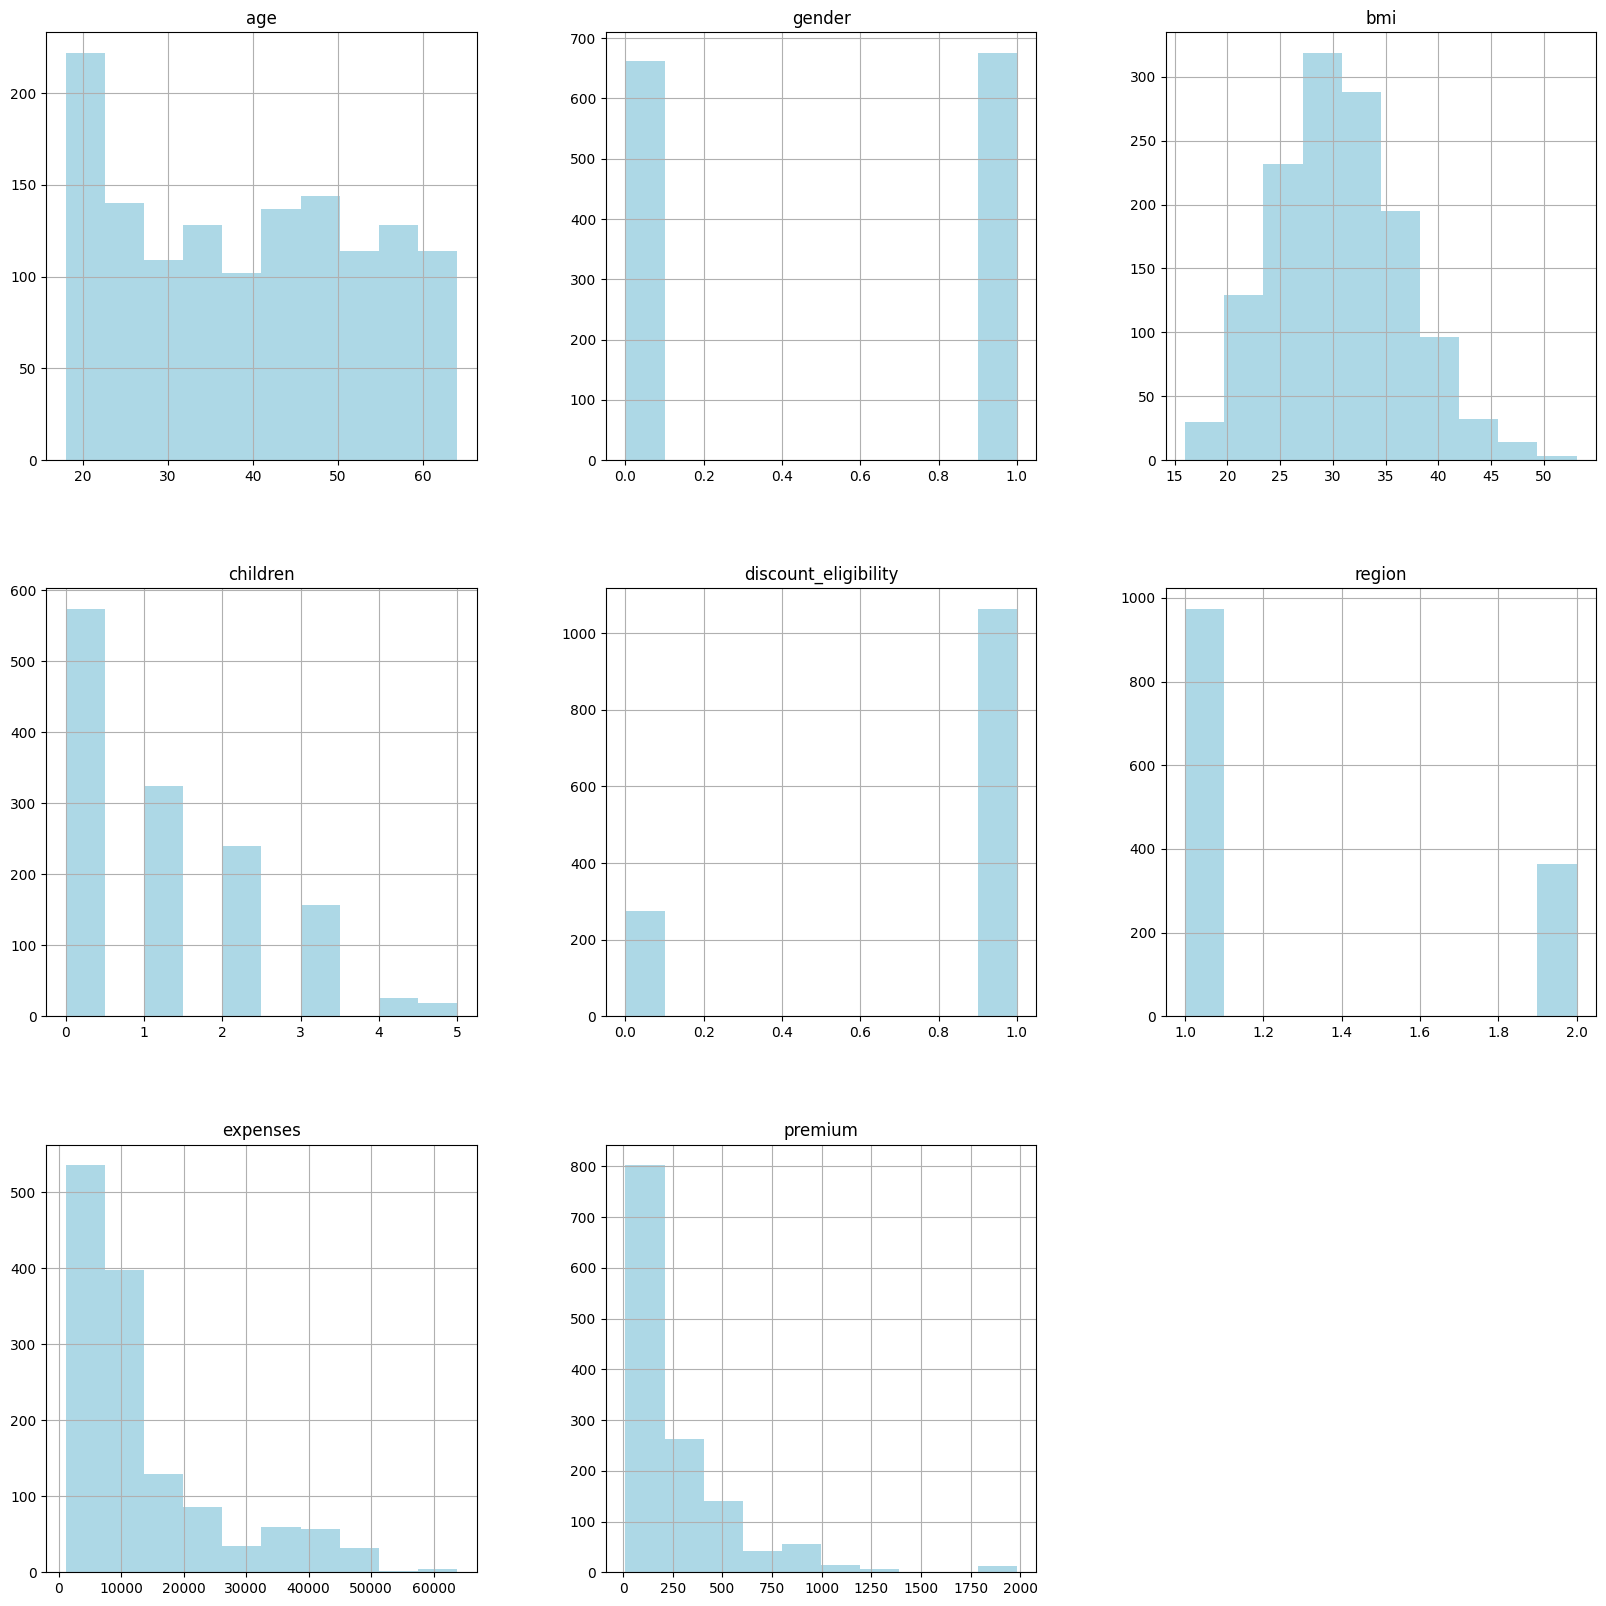

In [33]:
Insurance.hist(bins = 10 , grid = True  , figsize=(20 , 20) , color='lightblue')
plt.show()

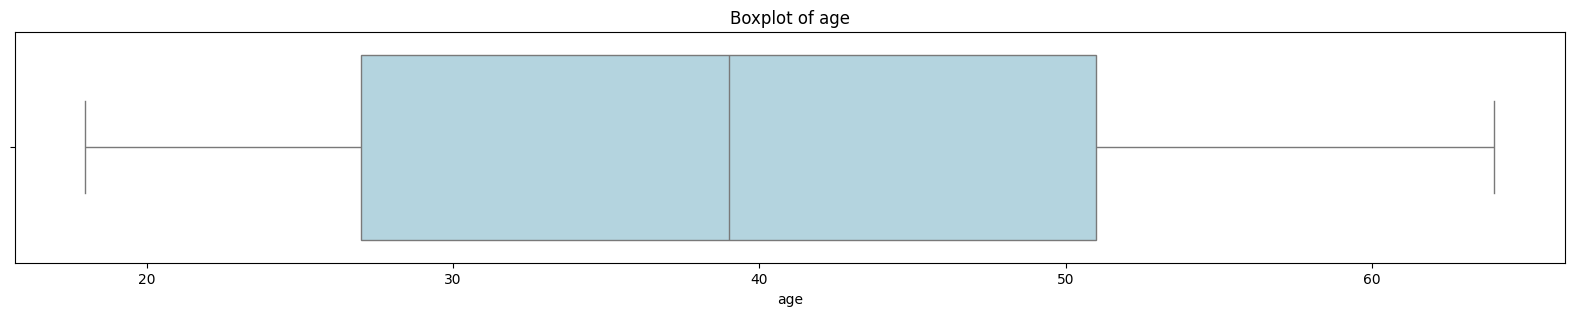

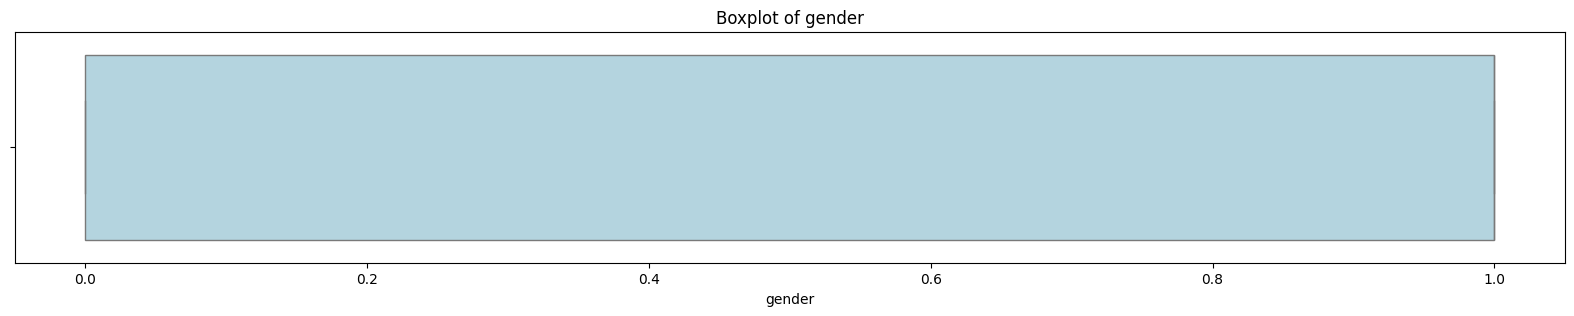

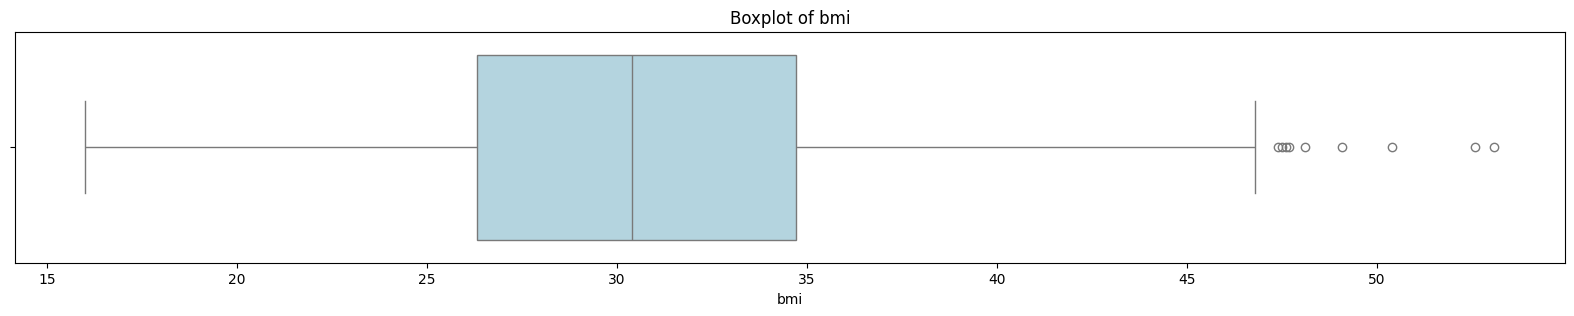

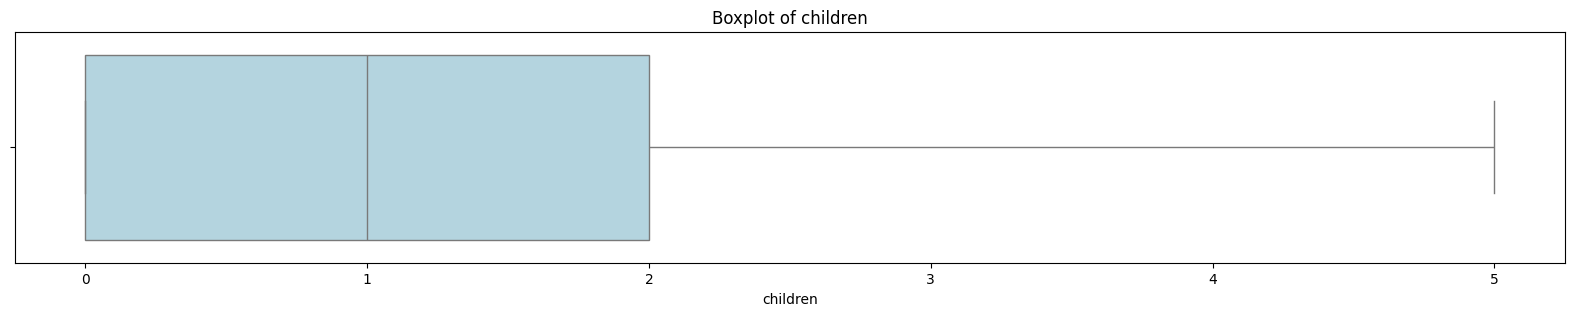

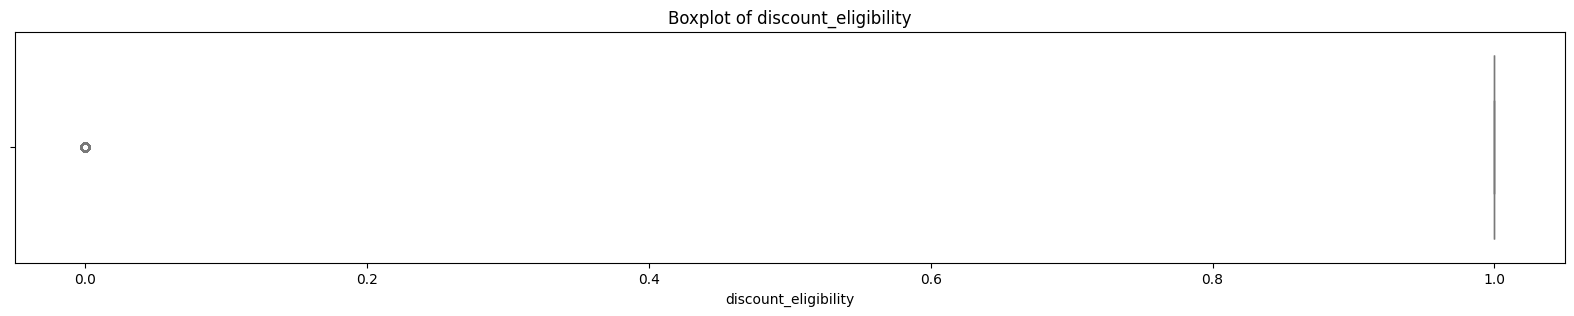

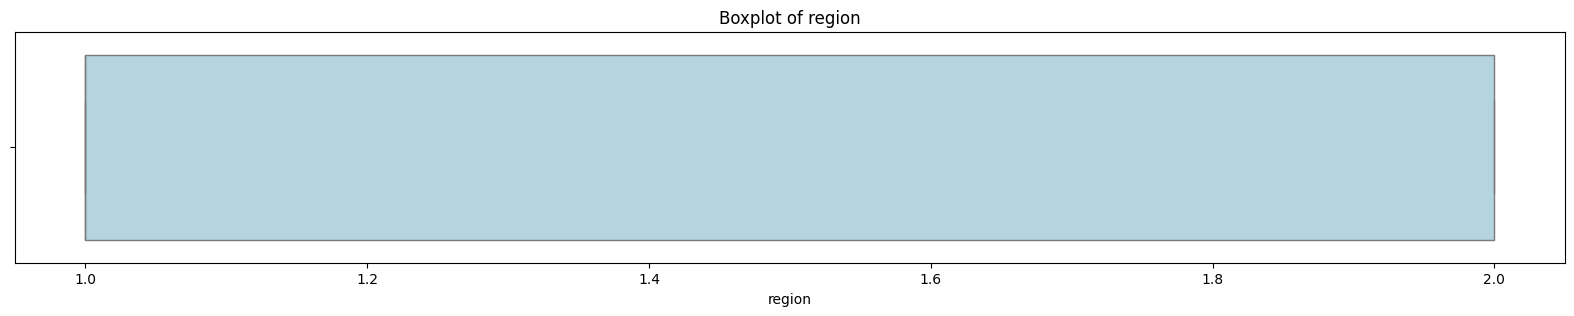

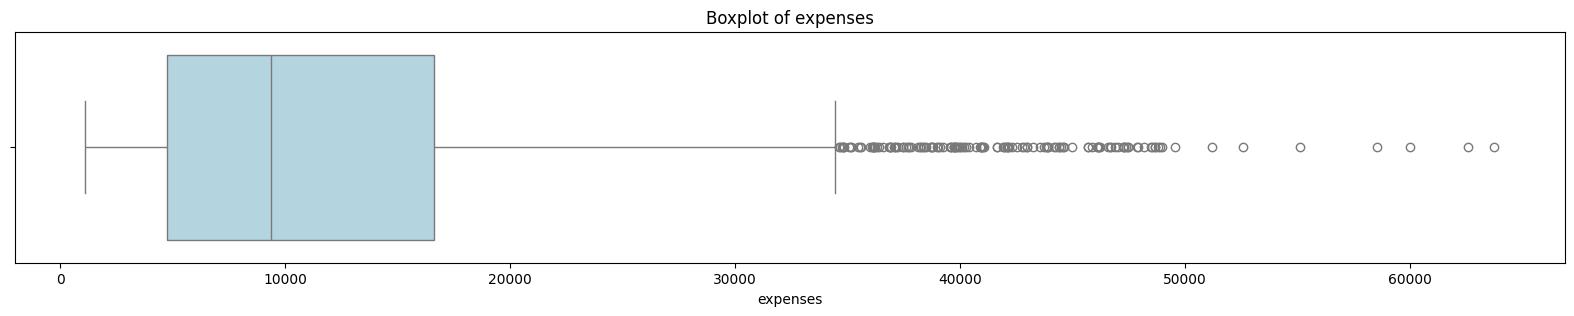

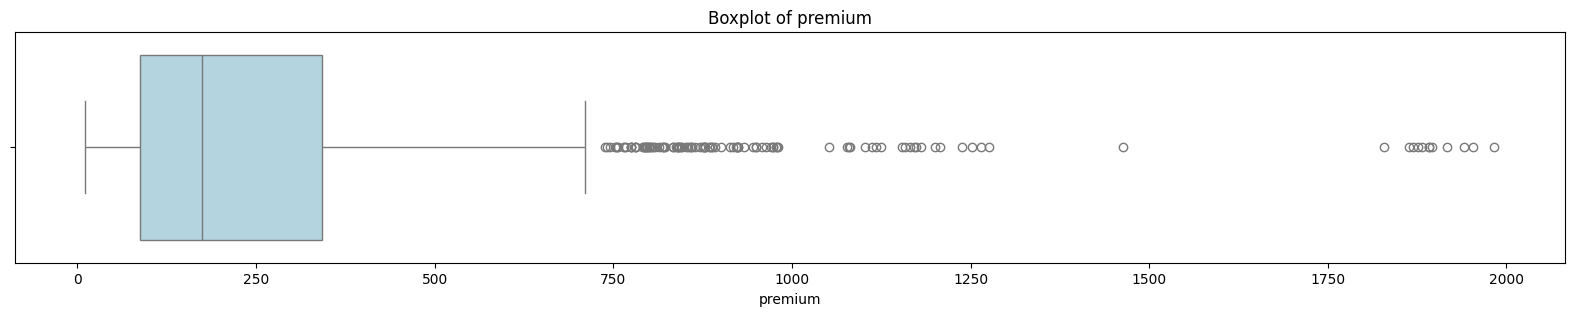

In [36]:
for col in Insurance:
    plt.figure(figsize=(20, 3))
    sns.boxplot(x=Insurance[col], color='lightblue')
    plt.title(f"Boxplot of {col}")

In [13]:
X= Insurance.drop(['expenses'] , axis=1)
y= Insurance['expenses']

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.1 , random_state=42)

In [15]:
X_test

,age,gender,bmi,children,discount_eligibility,region,premium
764,45,0,25.2,2,1,1,181.9014
887,36,0,30.0,0,1,1,105.4436
890,64,0,26.9,0,0,1,1173.2392
1293,46,1,25.7,3,1,1,186.0378
259,19,1,31.9,0,0,1,337.5029
...,...,...,...,...,...,...,...
358,23,1,41.9,0,1,2,18.3728
551,32,0,28.9,0,1,2,79.4584
778,35,1,34.3,3,1,2,118.6876
1127,35,0,35.9,2,1,2,116.7304


In [16]:
MMX = MinMaxScaler()
X_train=MMX.fit_transform(X_train)
X_test=MMX.transform(X_test)

In [17]:
X_train

array([[0.45652174, 0.        , 0.45283019, ..., 1.        , 0.        ,
        0.05161333],
       [0.89130435, 1.        , 0.56873315, ..., 1.        , 0.        ,
        0.11954266],
       [0.32608696, 1.        , 0.51752022, ..., 1.        , 0.        ,
        0.12012799],
       ...,
       [0.86956522, 1.        , 0.24797844, ..., 1.        , 0.        ,
        0.11532295],
       [0.41304348, 0.        , 0.85175202, ..., 0.        , 0.        ,
        0.46201997],
       [0.80434783, 1.        , 0.37466307, ..., 1.        , 0.        ,
        0.09791333]])

In [18]:
model_CTB = CatBoostRegressor(iterations=10000 , learning_rate=0.01 , loss_function='MAE' , depth = 8 , early_stopping_rounds=50, verbose=0)
model_CTB.fit(X_train , y_train)
y_pred_CTB=model_CTB.predict(X_test)
print(f'r2_score: {r2_score(y_test , y_pred_CTB)}')
print(f'mae: {mean_absolute_error(y_test, y_pred_CTB)}')

r2_score: 0.9946550874211716
mae: 329.2455767325953


In [19]:
model_XGB= XGBRegressor(random_state=42)
model_XGB.fit(X_train , y_train)
y_pred_XGB = model_XGB.predict(X_test)
print(f'r2_score: {r2_score(y_test , y_pred_XGB)}')
print(f'mae: {mean_absolute_error(y_test , y_pred_XGB)}')
print(f'mse: {mean_squared_error(y_test , y_pred_XGB)}')

r2_score: 0.9991175975722133
mae: 139.1272008366371
mse: 121732.08869224461


In [20]:
model_RFR= RandomForestRegressor(criterion = 'absolute_error' , random_state=42, n_estimators=100 , max_depth=9, min_samples_leaf=7,)
model_RFR.fit(X_train , y_train)
y_pred_RFR = model_RFR.predict(X_test)
print(f'r2_score: {r2_score(y_test , y_pred_RFR)}')
print(f'mae: {mean_absolute_error(y_test , y_pred_RFR)}')
print(f'mse: {mean_squared_error(y_test , y_pred_RFR)}')

r2_score: 0.9861388470678145
mae: 304.83714328358275
mse: 1912219.4647060388


In [21]:
model_KNN= KNeighborsRegressor(n_neighbors=5, leaf_size=3)
model_KNN.fit(X_train , y_train)
y_pred_KNN = model_KNN.predict(X_test)
print(f'r2_score: {r2_score(y_test , y_pred_KNN)}')
print(f'mae: {mean_absolute_error(y_test , y_pred_KNN)}')
print(f'mse: {mean_squared_error(y_test , y_pred_KNN)}')

r2_score: 0.8753774175201032
mae: 2044.5646417910448
mse: 17192345.335621346


In [22]:
model_ADB= AdaBoostRegressor(loss='exponential',random_state=46,n_estimators=1000 , learning_rate=0.01)
model_ADB.fit(X_train , y_train)
y_pred_ADB= model_ADB.predict(X_test)
print(f'r2_score: {r2_score(y_test , y_pred_ADB):.2f}')
print(f'mae: {mean_absolute_error(y_test , y_pred_ADB):.2f}')
print(f'mse: {mean_squared_error(y_test , y_pred_ADB):.2f}')

r2_score: 0.95
mae: 1804.32
mse: 6222839.06


#### (model_GBR= GradientBoostingRegressor(loss='huber', max_depth=4, random_state=46,n_estimators=800 , learning_rate=0.01)) without use of premium i got 1340 mae an 0.87 r2_score
#### If test size increases to 0.2 and without premium in X cols, the mae for expenses increases to 1574 and r2 will be 0.87615.
#### the same on on premium data i get r2_Score0.90 !! but mae=26. 


In [23]:
model_GBR= GradientBoostingRegressor(loss='huber', max_depth=8, random_state=42,n_estimators=1000 , learning_rate=0.01)
model_GBR.fit(X_train , y_train)
y_pred_GBR= model_GBR.predict(X_test)
print(f'r2_score_test: {r2_score(y_test , y_pred_GBR):.4f}')
print(f'mae_test: {mean_absolute_error(y_test , y_pred_GBR):.2f}')
print(f'mse_test: {mean_squared_error(y_test , y_pred_GBR):.2f}')

r2_score_test: 0.9998
mae_test: 62.67
mse_test: 32609.36


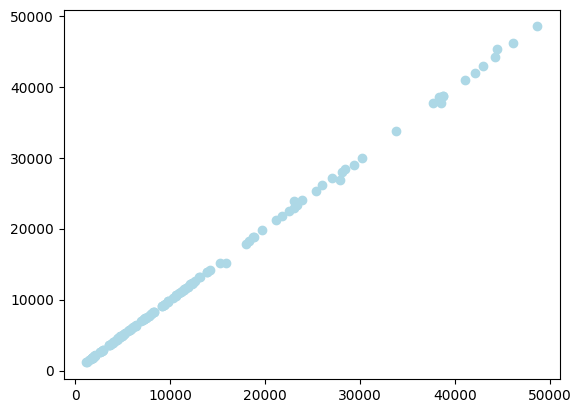

In [37]:
plt.scatter(y_test , y_pred_GBR ,color='lightblue' , marker='o')
plt.show()

In [25]:
model_GBR= GradientBoostingRegressor(loss='huber', max_depth=5, random_state=42,n_estimators=1000 , learning_rate=0.01)
model_GBR.fit(X_train , y_train)
y_pred_train_GBR= model_GBR.predict(X_train)
print(f'r2_score_train: {r2_score(y_train , y_pred_train_GBR):.4f}')
print(f'mae_train: {mean_absolute_error(y_train , y_pred_train_GBR):.2f}')
print(f'mse_train: {mean_squared_error(y_train, y_pred_train_GBR):.2f}')

r2_score_train: 0.9983
mae_train: 73.04
mse_train: 257356.62


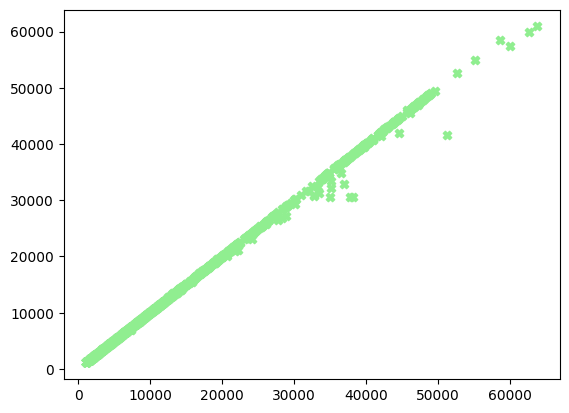

In [39]:
plt.scatter(y_train , y_pred_train_GBR , color='lightgreen', marker='X')

In [41]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores_r2 = cross_val_score(model_GBR, X, y, cv=kfold, scoring='r2')
scores_mse = cross_val_score(model_GBR, X, y, cv=kfold, scoring='neg_mean_squared_error')

print(f"R2 Scores for each fold: {scores_r2}")
print(f"Average R2 Score: {np.mean(scores_r2):.2f}")
print("-" * 30)
print(f"MSE for each fold: {-scores_mse}")
print(f"Average MSE: {-np.mean(scores_mse):.2f}")


R2 Scores for each fold: [0.99132674 0.99925278 0.99788038 0.99424236 0.9867002 ]
Average R2 Score: 0.99
------------------------------
MSE for each fold: [1346512.369544    106796.2285023   346868.61828642  651001.45862856
 2082854.96908985]
Average MSE: 906806.73


### GradientBoosting got the best r2_score(0.99 Average).